# 積分をPythonで理解する
---

#### 具体例で考える  
次のような関数を例にして考える  
## $$ f(x) = -x^2 + 5$$

In [1]:
# 関数定義
f = lambda x: -x**2 + 5 

In [2]:
# 先ほど使ったdrawf関数を再定義

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def drawf(n):
    y = [f(x) for x in np.arange(0, n, 0.1)]
    plt.plot(list(np.arange(0, n, 0.1)),y,'o-')
    plt.grid()

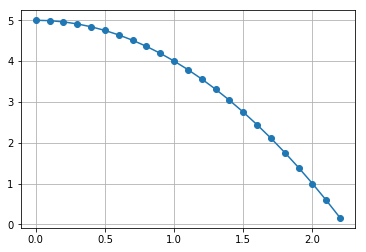

In [3]:
drawf(2.3)

0 ≦ x ≦ 2 の範囲が囲む面積を計算することを考える  
つまり、下図のような範囲の面積を計算したい

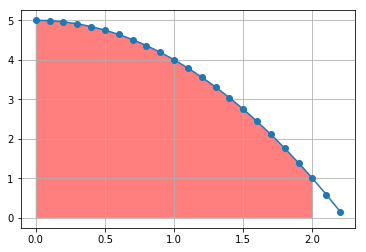

In [4]:
x = np.arange(0, 2.1, 0.1)
drawf(2.3)
plt.fill_between(x, np.zeros(len(x)), f(x), facecolor='r', alpha=0.5)

In [5]:
# fの横軸をn個に等分割して、四角形を描写する draw_split_squares_f 関数を定義する

def draw_split_squares_f(n):
    x = np.arange(0, 2+(2/n), 2/n)
    for i in range(len(x)-1):
        section_i = [x[i], x[i+1]]
        plt.fill_between(section_i, [0,0], [-x[i]**2 + 5, -x[i]**2 + 5], facecolor='r', alpha=0.5)

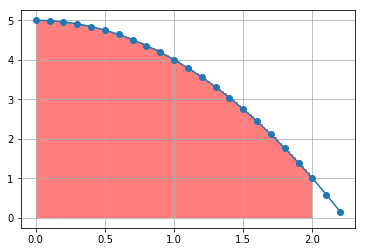

In [10]:
drawf(2.3)
draw_split_squares_f(100)

In [11]:
# 四角形の面積（タテ×ヨコ）を計算するsquare_area関数を定義する

def square_area(height, width):
    return height * (width[1] - width[0])

In [12]:
# 次のような性質をもつ　split_square_area関数を定義する
#     (i) 横軸をn個に等分割する
#    (ii) 分割したそれぞれの領域で、縦の長さがfの値になる四角形の面積の合計を計算する

def split_square_area(n):
    drawf(2.3)
    draw_split_squares_f(n)
    widths = np.arange(0, 2+(2/n), 2/n)
    result = 0
    for i in widths[:-1]:
        result += square_area(f(i), [i, i+(widths[1]-widths[0])])
    print("四角形の合計面積:{0}".format(result))

四角形の合計面積:7.337331999999991


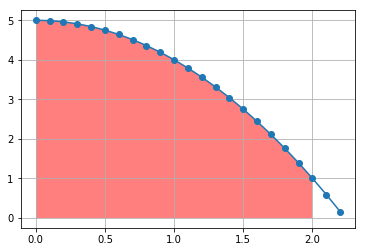

In [18]:
split_square_area(1000)

### 積分の定義における数式と見比べてみる  

関数$f$の区間$[a,b]$をn個に分割する。  
その分割した区間のi番目を$[x_{i}, x_{i+1}]$ と書くことにする。  

関数$f$の区間$[a, b]$における<b>定積分</b>の定義は、ざっくり言うと次のようになる。

### $$ \int_{a}^{b} f(x) dx = \lim_{n \to \infty} \sum_{i=0}^n f(x_{i})(x_{i+1} - x_{i}) $$  


<b>関数の積分の数式は読めるようになっている！</b>